In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [2]:
from sklearn import datasets
import pandas as pd
import matplotlib

# Change default size of plots
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

In [3]:
dataset = datasets.load_iris()
#?dataset

In [4]:
iris_pd = pd.DataFrame(dataset['data'], columns=['Petal Length', 'Petal Width', 'Sepal Length', 'Sepal Width'])
iris_pd['Species'] = dataset['target']
iris_pd['Species'] = iris_pd['Species'].apply(lambda x: dataset['target_names'][x])

In [5]:
import qgrid

qgrid_widget = qgrid.show_grid(iris_pd, show_toolbar=True)
qgrid_widget


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

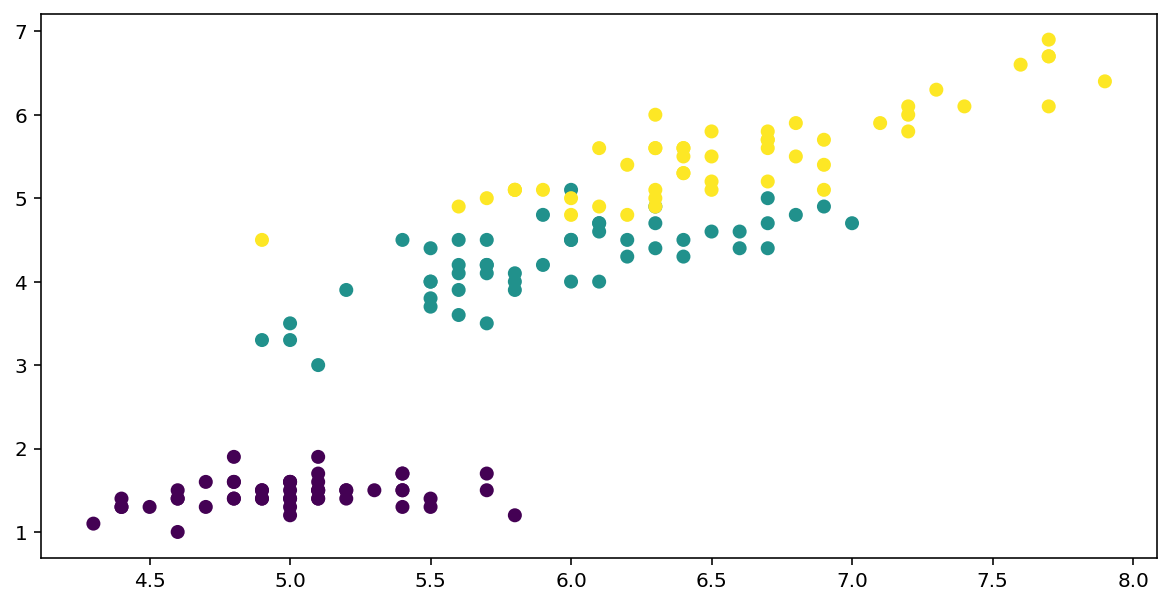

In [6]:
import matplotlib.pyplot as plt

# Need to add a column for color:
color_dict = {'setosa':0, 'versicolor':1., 'virginica':2.}
iris_pd['color'] = iris_pd['Species'].apply(lambda x: color_dict[x])

plt.scatter(x=iris_pd['Petal Length'], y=iris_pd['Sepal Length'], c=iris_pd['color'])
# No label

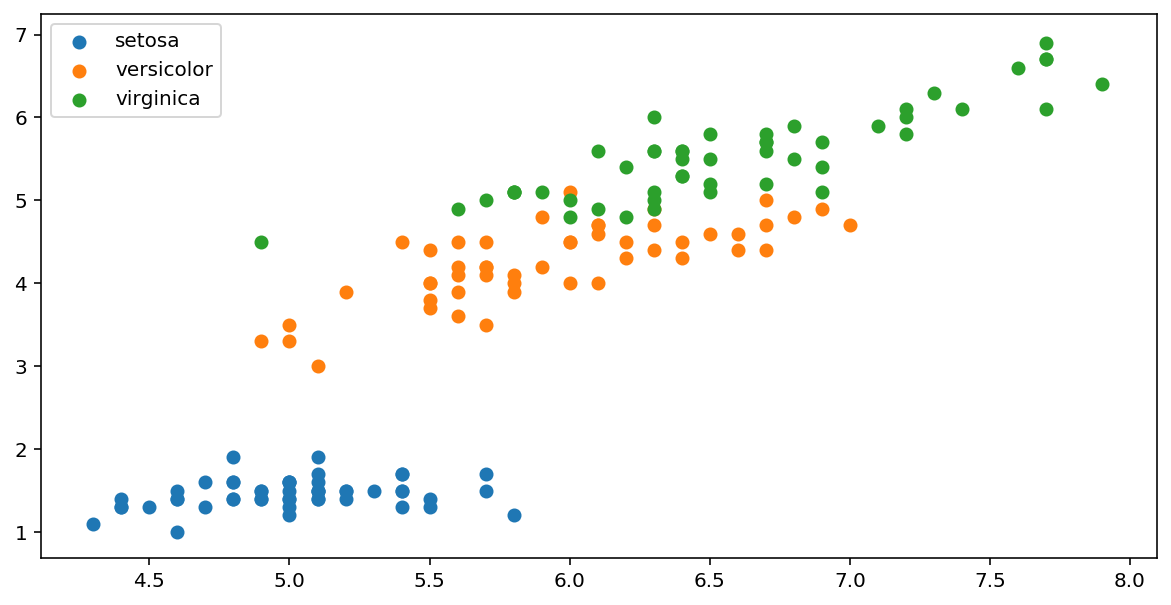

In [7]:
for name, group in iris_pd.groupby('Species'):
    plt.scatter(group['Petal Length'], group['Sepal Length'], label=name)
    
plt.legend()

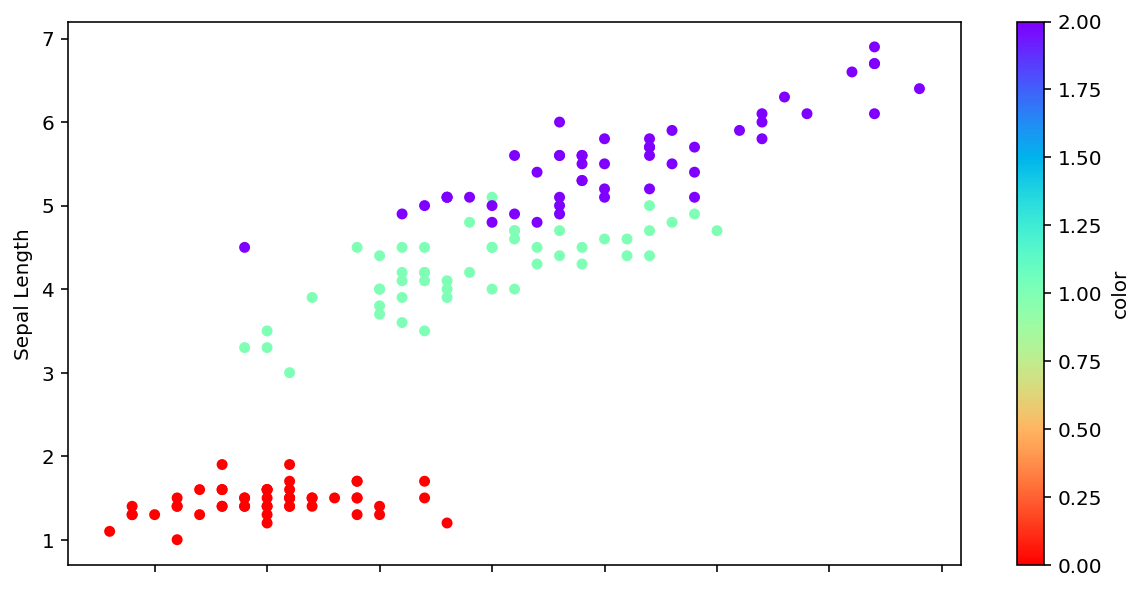

In [8]:
# Pandas plot
# Need numerical values as color
iris_pd.plot(kind='scatter', x='Petal Length', y='Sepal Length', c='color', colormap='rainbow_r')

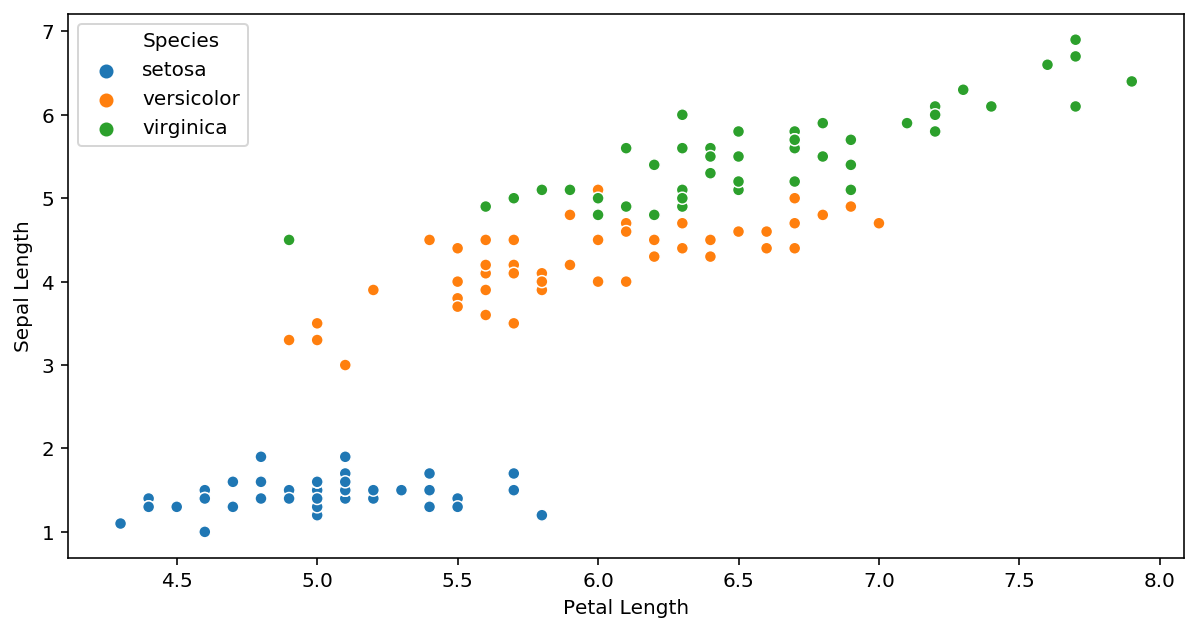

In [9]:
import seaborn as sns

sns.scatterplot(data=iris_pd, x='Petal Length', y='Sepal Length', hue='Species')

In [10]:
## imports required from rpy2
#from rpy2.robjects import pandas2ri   
#pandas2ri.activate()
#%reload_ext rpy2.ipython
import rpy2.rinterface

# Load R magic command
%reload_ext rpy2.ipython

# we need to activate the automatic conversion for pandas
from rpy2.robjects import pandas2ri
pandas2ri.activate()

/Users/smurail/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)
/Users/smurail/miniconda3/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Use suppressPackageStartupMessages() to eliminate package startup
messages.

  warnings.warn(x, RRuntimeWarning)


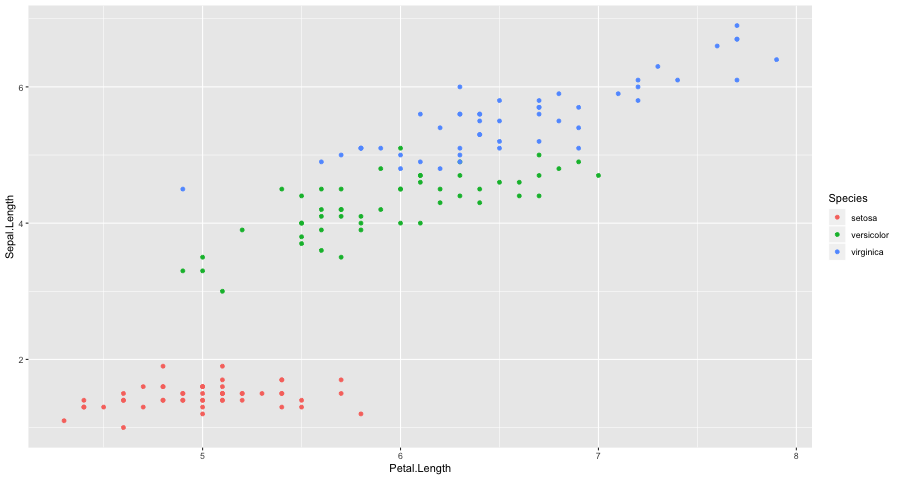

In [11]:
%%R -i iris_pd -w 900 -h 480 -u px

## Everything in here is ** R ** (magic)

# iris_pd is now an R dataframe
#print(iris_pd) 

library("ggplot2")
ggplot(data = iris_pd) +
geom_point(aes(x=Petal.Length, y=Sepal.Length, color = Species))



In [12]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# Create a trace
trace = go.Scatter(
    x=iris_pd['Petal Length'], 
    y=iris_pd['Sepal Length'],
    mode = 'markers',
    marker=dict(color=iris_pd['color'],
                size=10,
                colorscale='Viridis',
                showscale=False))

layout = go.Layout(title='Training Points',
                   xaxis=dict(title='Petal Length',
                            showgrid=False),
                   yaxis=dict(title='Sepal Length',
                            showgrid=True))
 
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [13]:
from bokeh.plotting import figure, show, output_file, output_notebook

color_dict = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
colors = [color_dict[x] for x in iris_pd['Species']]

p = figure(title = "Iris Morphology")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'

p.circle(iris_pd["Petal Length"], iris_pd["Sepal Length"],
         color=colors, fill_alpha=0.9, size=10)

output_notebook()

show(p)



Loading BokehJS ...

In [22]:
import nglview
view = nglview.demo()  # load "3pqr" from RCSB PDB and display viewer widget

view


NGLWidget()

In [16]:
import ipywidgets 
ipywidgets.Text("hello") 

Text(value='hello')

In [18]:
nglview --enable

NameError: name 'enable' is not defined